<a href="https://colab.research.google.com/github/ToluClassics/DEEP-LEARNING-FRANCOI-CHOLLET-ALL-EXERCISES/blob/master/iMdbDatasetCLassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers

In [0]:
(train_review,train_label),(test_review,test_label) = imdb.load_data(num_words=10000)

In [49]:
len(train_review)

25000

In [50]:
len(train_review[1])

189

In [51]:
word_index = imdb.get_word_index()

word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [52]:
inv_map = {v: k for k, v in word_index.items()}

inv_map

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [53]:
new_review = []

for i in train_review[1]:
  word = inv_map[i]
  new_review.append(word)
  
' '.join(new_review)

"the thought solid thought senator do making to is spot nomination assumed while he of jack in where picked as getting on was did hands fact characters to always life thrillers not as me can't in at are br of sure your way of little it strongly random to view of love it so principles of guy it used producer of where it of here icon film of outside to don't all unique some like of direction it if out her imagination below keep of queen he diverse to makes this stretch and of solid it thought begins br senator and budget worthwhile though ok and awaiting for ever better were and diverse for budget look kicked any to of making it out and follows for effects show to show cast this family us scenes more it severe making senator to and finds tv tend to of emerged these thing wants but and an beckinsale cult as it is video do you david see scenery it in few those are of ship for with of wild to one is very work dark they don't do dvd with those them"

In [54]:
train_review[1][:10]

[1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463]

In [0]:
def vectorize_sequences(sequence_data,dimension=10000):
  encoded_result = np.zeros((len(sequence_data),dimension))
  for i,sequence in enumerate(sequence_data):
    encoded_result[i,sequence] = 1
  return encoded_result

In [0]:
train_review = vectorize_sequences(train_review)

test_review = vectorize_sequences(test_review)

In [57]:
train_review[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
#Vectorizing the lables by converting to arrays

train_label = np.asarray(train_label).astype('float32')
test_label = np.asarray(test_label).astype('float32')

In [0]:
model = models.Sequential()

model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(32,activation='relu'))

model.add(layers.Dense(1,activation='sigmoid'))

In [60]:
model

In [61]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

'''or

from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
'''

'or\n\nfrom keras import losses\nfrom keras import metrics\nmodel.compile(optimizer=optimizers.RMSprop(lr=0.001),\n              loss=losses.binary_crossentropy,\n              metrics=[metrics.binary_accuracy])\n'

In [0]:
#Setting aside a validation set

val_review = train_review[:10000]
val_label = train_label[: 10000]


new_train_review = train_review[10000:]
new_train_label = train_label[10000:]

In [63]:
history = model.fit(new_train_review,new_train_label,epochs=20,
                    batch_size=512,validation_data=(val_review,val_label))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.4932 - accuracy: 0.7655 - val_loss: 0.4153 - val_accuracy: 0.8202
Epoch 2/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.2695 - accuracy: 0.9046 - val_loss: 0.3272 - val_accuracy: 0.8637
Epoch 3/20
15000/15000 [==============================] - 2s 144us/step - loss: 0.2036 - accuracy: 0.9244 - val_loss: 0.2809 - val_accuracy: 0.8891
Epoch 4/20
15000/15000 [==============================] - 3s 198us/step - loss: 0.1518 - accuracy: 0.9468 - val_loss: 0.3113 - val_accuracy: 0.8805
Epoch 5/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.1206 - accuracy: 0.9579 - val_loss: 0.3032 - val_accuracy: 0.8859
Epoch 6/20
15000/15000 [==============================] - 2s 136us/step - loss: 0.1000 - accuracy: 0.9655 - val_loss: 0.3347 - val_accuracy: 0.8785
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [64]:
history_metrics = history.history

print(history_metrics)

{'val_loss': [0.41527610659599307, 0.32719492812156675, 0.28085753479003905, 0.3112564999103546, 0.3032431542873383, 0.33472825651168825, 0.3579041111946106, 0.39337564363479616, 0.42074666328430177, 0.45700317878723146, 0.5132551704406738, 0.539625402545929, 0.7232211439132691, 0.6246280567169189, 0.6537120112419128, 0.6878570902824401, 0.7428731672286988, 0.7671055307388306, 0.7930079262733459, 0.8384564023017883], 'val_accuracy': [0.8202000260353088, 0.8636999726295471, 0.8891000151634216, 0.8805000185966492, 0.8859000205993652, 0.8784999847412109, 0.8812999725341797, 0.880299985408783, 0.8792999982833862, 0.8762999773025513, 0.8744999766349792, 0.8747000098228455, 0.855400025844574, 0.8676000237464905, 0.8719000220298767, 0.871999979019165, 0.8700000047683716, 0.8672000169754028, 0.8664000034332275, 0.8668000102043152], 'loss': [0.49323573274612426, 0.26952600397268933, 0.20357404098510742, 0.15179768302440644, 0.12063112288713455, 0.09996672283411026, 0.07243127247095107, 0.059345

<function matplotlib.pyplot.show>

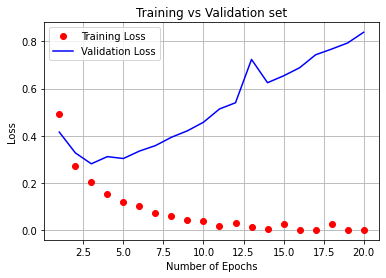

In [65]:
train_loss = history_metrics['loss']
validation_loss = history_metrics['val_loss']

epochs = range(1, len(validation_loss)+1)

plt.plot(epochs,train_loss,'ro',label='Training Loss')
plt.plot(epochs,validation_loss,'b',label='Validation Loss')
plt.title('Training vs Validation set')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show

In [66]:
results = model.evaluate(test_review,test_label)

25000/25000 [==============================] - 2s 80us/step


In [67]:
results

[0.9150240439939499, 0.8532800078392029]